<a href="https://colab.research.google.com/github/PALLITULASIRAM/task-7-svm/blob/main/task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (569, 2)
Classes: ['malignant' 'benign']

--- Linear Kernel Results ---
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114


--- RBF Kernel Results ---
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.93      0.94      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



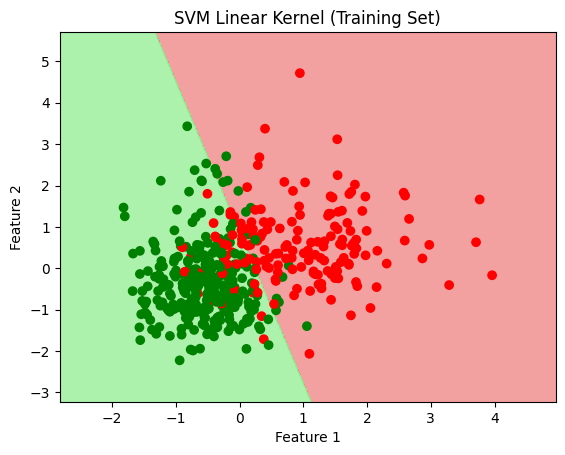

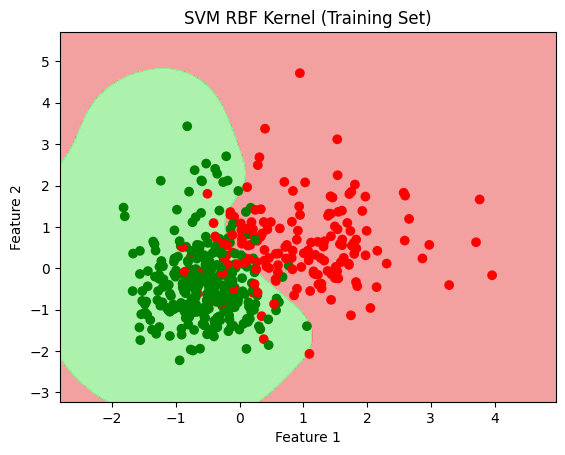


Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-validation Accuracy: 0.9010989010989011

Cross-validation Scores: [0.89010989 0.91208791 0.95604396 0.87912088 0.86813187]
Mean CV Accuracy: 0.9010989010989011

Final Model Accuracy: 0.9122807017543859
[[38  5]
 [ 5 66]]


In [1]:
# Task 7: Support Vector Machines (SVM)
# -------------------------------------
# Objective: Use SVMs for linear and non-linear classification.

# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# Step 2: Load Dataset (Breast Cancer Dataset from sklearn)
data = datasets.load_breast_cancer()
X = data.data[:, :2]  # Use only two features for 2D visualization
y = data.target

print("Dataset shape:", X.shape)
print("Classes:", data.target_names)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train Linear SVM
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# Step 6: Train Non-linear SVM (RBF Kernel)
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.7)
svm_rbf.fit(X_train, y_train)

# Step 7: Evaluate both models
print("\n--- Linear Kernel Results ---")
y_pred_linear = svm_linear.predict(X_test)
print(classification_report(y_test, y_pred_linear))

print("\n--- RBF Kernel Results ---")
y_pred_rbf = svm_rbf.predict(X_test)
print(classification_report(y_test, y_pred_rbf))

# Step 8: Visualize Decision Boundaries
def plot_decision_boundary(model, X, y, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(
        np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.01),
        np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.01)
    )
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('lightcoral', 'lightgreen')))
    plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')))
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(svm_linear, X_train, y_train, "SVM Linear Kernel (Training Set)")
plot_decision_boundary(svm_rbf, X_train, y_train, "SVM RBF Kernel (Training Set)")

# Step 9: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)
print("Best Cross-validation Accuracy:", grid.best_score_)

# Step 10: Cross-validation for Model Evaluation
cv_scores = cross_val_score(grid.best_estimator_, X_train, y_train, cv=5)
print("\nCross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Step 11: Final Evaluation
y_pred_final = grid.predict(X_test)
print("\nFinal Model Accuracy:", accuracy_score(y_test, y_pred_final))
print(confusion_matrix(y_test, y_pred_final))
